In [1]:
# 导入相关库
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import normalize

In [3]:
df = pd.read_csv('simple_pro_1.csv')

In [4]:
df

,Unnamed: 0,order number,start,end,entity,entity_type,MESH
0,0,32911311,0,16,Critical illness,Disease,MESH:D016638
1,1,32911311,59,67,COVID-19,Disease,MESH:C000657245
2,2,32911311,68,77,infection,Disease,MESH:D007239
3,3,32911311,107,115,COVID-19,Disease,MESH:C000657245
4,4,32911311,116,125,infection,Disease,MESH:D007239
...,...,...,...,...,...,...,...
999995,999995,34720358,16825,16829,HEPA,Chemical,-
999996,999996,34720358,16992,16999,patient,Species,9606
999997,999997,34720358,17267,17277,waterproof,Chemical,-
999998,999998,34720358,17399,17403,HEPA,Chemical,-


In [21]:
raw = pd.read_csv('result_all.txt', delimiter='\t',header=None)
title_raw = pd.read_csv('标题信息.txt', delimiter='\t',header=None)

In [22]:
title_raw.drop_duplicates(subset=title_raw.columns[0], keep='first', inplace=True)#去除标题数据，id重复
merged_df = pd.merge(raw, title_raw, on=raw.columns[0] and title_raw.columns[0], how='inner')#匹配上
df = merged_df.copy()
merged_df.drop_duplicates(subset=merged_df.columns[0], keep='first', inplace=True)
merged_df

,0,1_x,2,3,4,5,1_y
0,32911311,0,16,Critical illness,Disease,MESH:D016638,Critical illness-associated cerebral microblee...
179,34061905,67,76,mammalian,Species,9606,Extensive C->U transition biases in the genome...
411,34898715,11,19,COVID-19,Disease,MESH:C000657245,Effects of COVID-19 on integration of women re...
654,34910338,51,56,spike,Gene,43740568,Time course of antibody concentrations against...
714,32292259,75,83,COVID-19,Disease,MESH:C000657245,Understanding of guidance for acupuncture and ...
...,...,...,...,...,...,...,...
16496083,33317566,10,17,heparin,Chemical,MESH:D006493,Suspected heparin-induced thrombocytopenia in ...
16496303,34728130,71,78,obesity,Disease,MESH:D009765,A telehealth intervention for ensuring continu...
16496400,34192087,28,39,Skin Damage,Disease,MESH:D012871,Prevention and Treatment of Skin Damage Caused...
16496527,34817587,25,35,SARS-CoV-2,Species,2697049,Assessment of 4 Doses of SARS-CoV-2 Messenger ...


In [24]:
id = merged_df.iloc[:,0]
id

0           32911311
179         34061905
411         34898715
654         34910338
714         32292259
              ...   
16496083    33317566
16496303    34728130
16496400    34192087
16496527    34817587
16496590    33147206
Name: 0, Length: 89507, dtype: int64

In [25]:
id.to_csv('id.csv')

In [ ]:
enti_type=pre_data(df,5)

In [ ]:
count=countvect(enti_type)
count = normalize (count, axis=0) # 对列进行标准化

In [31]:
merged_df.to_csv('all_titles.csv', index=False)
title=merged_df.iloc[:,6]
titles = title.tolist()

In [33]:
titles = title.tolist()
titles
df = pd.read_csv('all_titles.csv')
df

,0,1_x,2,3,4,5,1_y
0,32911311,0,16,Critical illness,Disease,MESH:D016638,Critical illness-associated cerebral microblee...
1,34061905,67,76,mammalian,Species,9606,Extensive C->U transition biases in the genome...
2,34898715,11,19,COVID-19,Disease,MESH:C000657245,Effects of COVID-19 on integration of women re...
3,34910338,51,56,spike,Gene,43740568,Time course of antibody concentrations against...
4,32292259,75,83,COVID-19,Disease,MESH:C000657245,Understanding of guidance for acupuncture and ...
...,...,...,...,...,...,...,...
89502,33317566,10,17,heparin,Chemical,MESH:D006493,Suspected heparin-induced thrombocytopenia in ...
89503,34728130,71,78,obesity,Disease,MESH:D009765,A telehealth intervention for ensuring continu...
89504,34192087,28,39,Skin Damage,Disease,MESH:D012871,Prevention and Treatment of Skin Damage Caused...
89505,34817587,25,35,SARS-CoV-2,Species,2697049,Assessment of 4 Doses of SARS-CoV-2 Messenger ...


In [2]:
raw = pd.read_csv('simple_pro_1.csv')
raw2 = pd.read_csv('simple_pro_2.csv')
df = pd.concat([raw, raw2], axis=0)

In [13]:
enti_type=pre_data(df,5)
countvect(enti_type)

['cellline', 'chemical', 'disease', 'dnaacidchange', 'gene', 'mutation', 'proteinacidchange', 'species']
[[  0   7 121 ...   0   0  70]
 [  0   0 123 ...   0   0  74]
 [  0   0  48 ...   0   0   8]
 ...
 [  0  15 106 ...   0   0  75]
 [  0   0  51 ...   0   0 100]
 [  0  29  37 ...   0   0  23]]


E:\Anaconda\envs\pytorch.gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[  0,   7, 121, ...,   0,   0,  70],
       [  0,   0, 123, ...,   0,   0,  74],
       [  0,   0,  48, ...,   0,   0,   8],
       ...,
       [  0,  15, 106, ...,   0,   0,  75],
       [  0,   0,  51, ...,   0,   0, 100],
       [  0,  29,  37, ...,   0,   0,  23]], dtype=int64)

In [36]:
count=countvect(enti_type)
count = normalize (count, axis=0) # 对列进行标准化

['cellline', 'chemical', 'disease', 'dnaacidchange', 'gene', 'mutation', 'proteinacidchange', 'species']
[[  0   7 121 ...   0   0  70]
 [  0   0 123 ...   0   0  74]
 [  0   0  48 ...   0   0   8]
 ...
 [  0  15 106 ...   0   0  75]
 [  0   0  51 ...   0   0 100]
 [  0  29  37 ...   0   0  23]]


E:\Anaconda\envs\pytorch.gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[  0,   7, 121, ...,   0,   0,  70],
       [  0,   0, 123, ...,   0,   0,  74],
       [  0,   0,  48, ...,   0,   0,   8],
       ...,
       [  0,  15, 106, ...,   0,   0,  75],
       [  0,   0,  51, ...,   0,   0, 100],
       [  0,  29,  37, ...,   0,   0,  23]], dtype=int64)

In [24]:
# 定义参数
num_clusters = 5 # 聚类个数，可以根据实际情况调整
max_length = 64 # 文献标题的最大长度，超过则截断
model_name = "bert-base-chinese" # 使用的预训练模型名称，可以换成其他支持中文的模型

# 加载分词器和模型
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 对文献标题进行编码，得到每个标题的向量表示
title_ids = tokenizer(titles, padding=True, truncation=True, max_length=max_length, return_tensors="pt")["input_ids"]
with torch.no_grad():
    title_embeddings = model(title_ids)[1].numpy() # 使用模型的最后一层输出作为向量表示

SSLError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-chinese/resolve/main/tokenizer_config.json (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1131)')))

In [13]:
# 读取文献标题数据，假设每行一个标题，存储在titles.txt文件中
with open("titles.txt", "r", encoding="utf-8") as f:
    titles = f.read().splitlines()

In [14]:
titles

['COVID-19 and the cardiovascular system',
 'Stepping up infection control measures in ophthalmology during the novel coronavirus outbreak: an experience from Hong Kong',
 'Impact of COVID-19 on Public Mental Health and the Buffering Effect of a Sense of Coherence',
 'COVID-19 and the crisis of national development',
 'Importation and Human-to-Human Transmission of a Novel Coronavirus in Vietnam',
 'Return of the Coronavirus: 2019-nCoV',
 'The Extent of Transmission of Novel Coronavirus in Wuhan, China, 2020',
 'Real-time tentative assessment of the epidemiological characteristics of novel coronavirus infections in Wuhan, China, as at 22 January 2020',
 'Identification of a novel coronavirus causing severe pneumonia in human: a descriptive study',
 'SARS-CoV, MERS-CoV and now the 2019-novel CoV: Have we investigated enough about coronaviruses? - A bibliometric analysis',
 'Preliminary estimation of the basic reproduction number of novel coronavirus (2019-nCoV) in China, from 2019 to 20

In [19]:
import torch
from transformers import AutoTokenizer, BioGptForCausalLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/biogpt")
model = BioGptForCausalLM.from_pretrained("microsoft/biogpt")

In [26]:
# 对文献标题进行编码，得到每个标题的向量表示
title_ids = tokenizer(titles, padding=True, truncation=True, max_length=max_length, return_tensors="pt")["input_ids"]
with torch.no_grad():
    title_embeddings = model(title_ids)[1].numpy() # 使用模型的最后一层输出作为向量表示

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 17597792256 bytes.

In [22]:
title_embeddings

NameError: name 'title_embeddings' is not defined

In [7]:
# 使用K-Means算法对标题向量进行聚类
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(title_embeddings)
labels = kmeans.labels_ # 获得每个标题的聚类标签

# 打印聚类结果，每个类别输出一个标题作为示例
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for j in range(len(titles)):
        if labels[j] == i:
            print(f"- {titles[j]}")
            break # 只输出一个标题作为示例，如需输出全部，请注释掉这一行

Cluster 0:
- Critical illness-associated cerebral microbleeds in severe COVID-19 infection
Cluster 1:
- Cybersecurity Risks in a Pandemic
Cluster 2:
- The symptomatic breast services in a university hospital: pandemic peak compared to the pre-pandemic year and future implications
Cluster 3:
- Effects of COVID-19 on integration of women refugees into Turkish society
Cluster 4:
- Extensive C->U transition biases in the genomes of a wide range of mammalian RNA viruses; potential associations with transcriptional mutations, damage- or host-mediated editing of viral RNA


For n_clusters = 2 The average silhouette_score is : 0.934805581946676


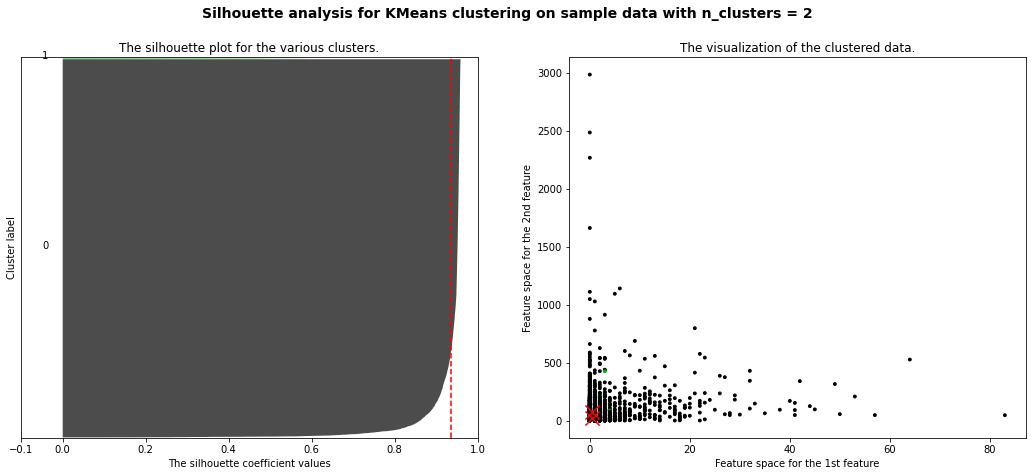

For n_clusters = 3 The average silhouette_score is : 0.6509775205823146


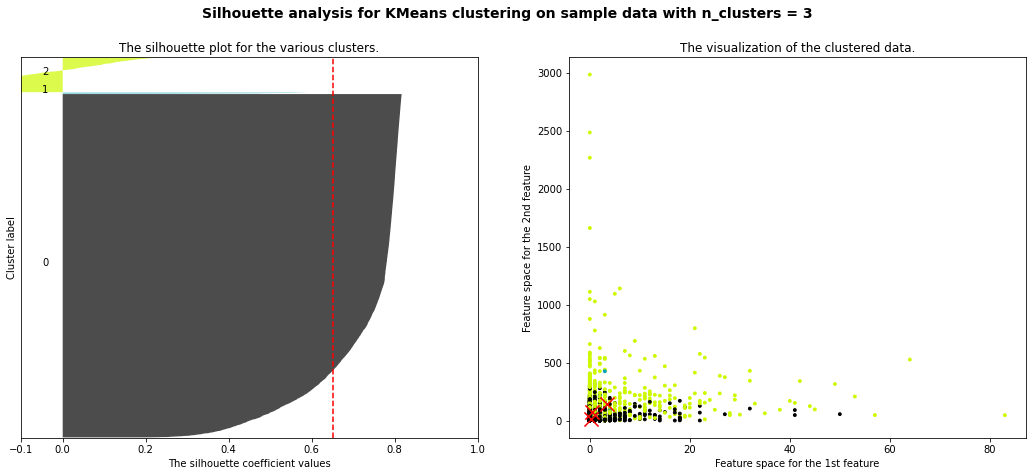

For n_clusters = 4 The average silhouette_score is : 0.4607628491915887


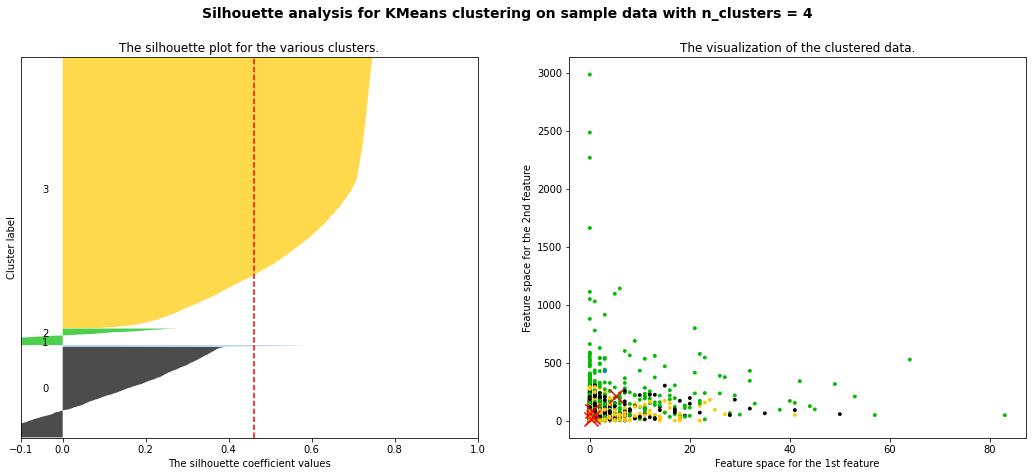

For n_clusters = 5 The average silhouette_score is : 0.4598495693026027


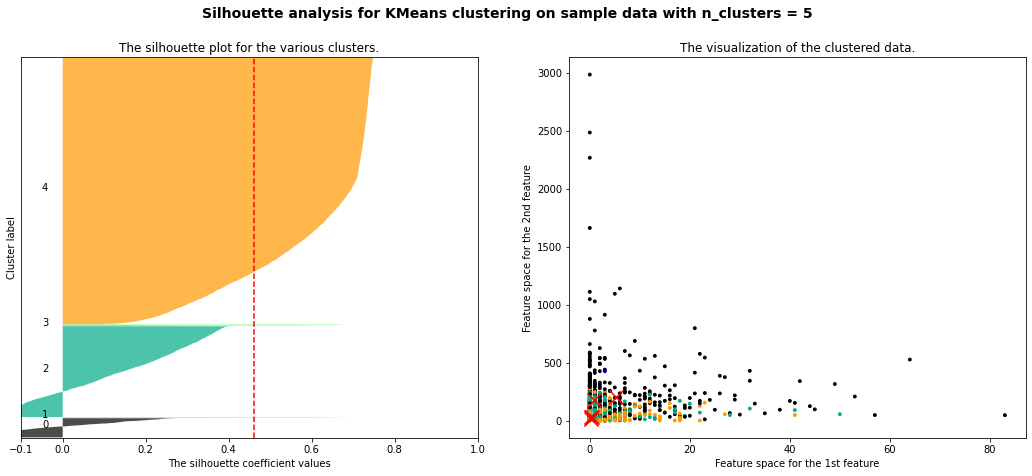

For n_clusters = 6 The average silhouette_score is : 0.45857383114079003


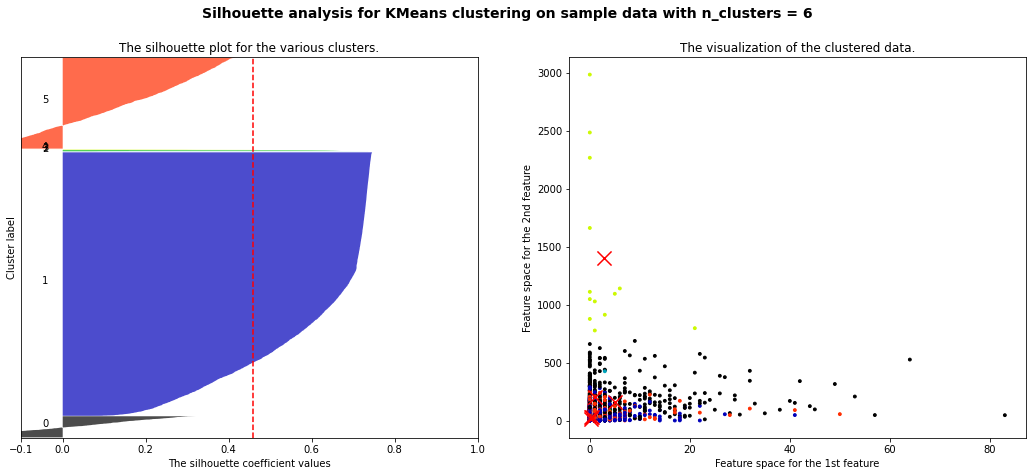

For n_clusters = 7 The average silhouette_score is : 0.46465102118549817


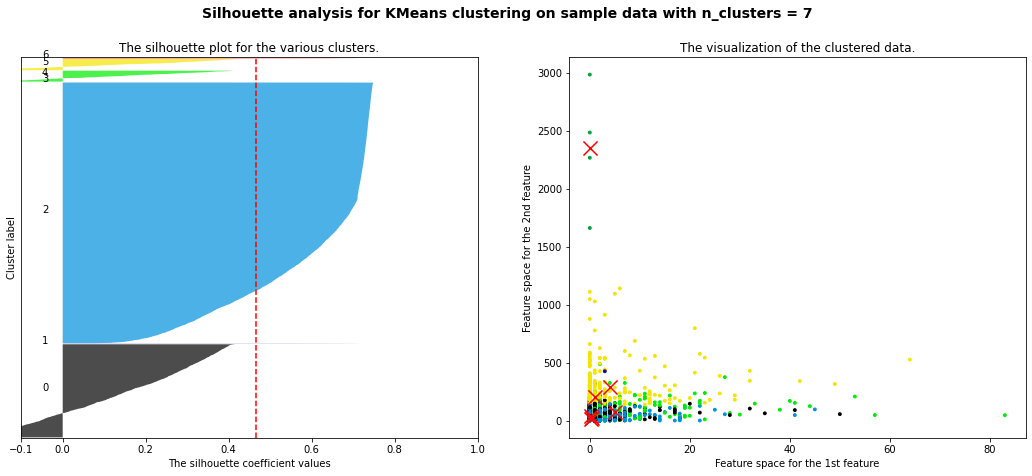

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
X= np.concatenate ( (title_embeddings, count), axis=1) # 沿着第0轴（行）合并

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig ('EMG {0}.jpg'.format (i))
    plt.show()

In [24]:
str(1)

'1'

E:\Anaconda\envs\pytorch.gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Anaconda\envs\pytorch.gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


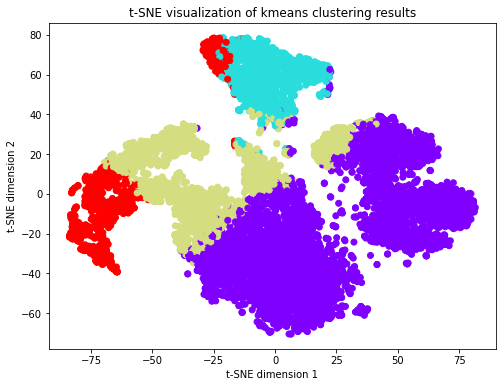

In [229]:
# 导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# 使用kmeans对高维数据进行聚类，指定簇的数量为4
kmeans = KMeans(n_clusters=4, random_state=4)
kmeans.fit(title_embeddings)
labels = kmeans.labels_

# 使用t-SNE对高维数据进行降维，指定目标维度为2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 使用matplotlib对降维后的数据进行可视化，根据聚类标签或簇标签给不同的数据点分配不同的颜色和形状
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, marker='o', cmap='rainbow')
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='x', cmap='rainbow')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE visualization of kmeans clustering results')
plt.show()

In [9]:
enti_type=pre_data(df,5)
countvect(enti_type)

NameError: name 'pre_data' is not defined

In [239]:
count=countvect(enti_type)

['cellline', 'chemical', 'disease', 'dnaacidchange', 'gene', 'mutation', 'proteinacidchange', 'species']
[[  0   7 121 ...   0   0  70]
 [  0   0 123 ...   0   0  74]
 [  0   0  48 ...   0   0   8]
 ...
 [  0  15 106 ...   0   0  75]
 [  0   0  51 ...   0   0 100]
 [  0  29  37 ...   0   0  23]]


E:\Anaconda\envs\pytorch.gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


已完成： 0.0
已完成： 0.004484304932735426
已完成： 0.008968609865470852
已完成： 0.013452914798206279
已完成： 0.017937219730941704
已完成： 0.02242152466367713
已完成： 0.026905829596412557
已完成： 0.03139013452914798
已完成： 0.03587443946188341
已完成： 0.04035874439461883
已完成： 0.04484304932735426
已完成： 0.04932735426008968
已完成： 0.053811659192825115
已完成： 0.05829596412556054
已完成： 0.06278026905829596
已完成： 0.06726457399103139
已完成： 0.07174887892376682
已完成： 0.07623318385650224
已完成： 0.08071748878923767
已完成： 0.08520179372197309
已完成： 0.08968609865470852
已完成： 0.09417040358744394
已完成： 0.09865470852017937
已完成： 0.1031390134529148
已完成： 0.10762331838565023
已完成： 0.11210762331838565
已完成： 0.11659192825112108
已完成： 0.1210762331838565
已完成： 0.12556053811659193
已完成： 0.13004484304932734
已完成： 0.13452914798206278
已完成： 0.13901345291479822
已完成： 0.14349775784753363
已完成： 0.14798206278026907
已完成： 0.15246636771300448
已完成： 0.15695067264573992
已完成： 0.16143497757847533
已完成： 0.16591928251121077
已完成： 0.17040358744394618
已完成： 0.17488789237668162
已完成： 0.17937

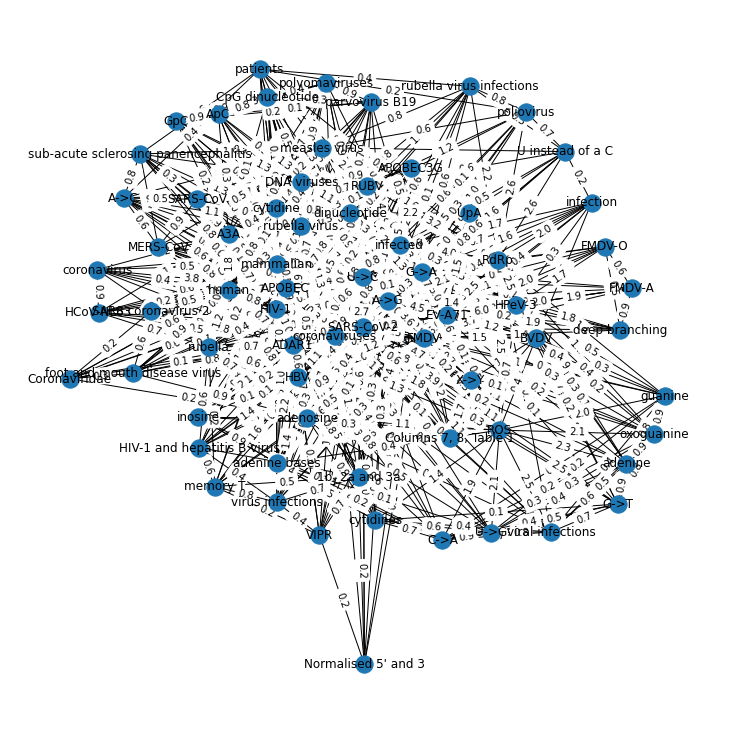

In [24]:
# 导入必要的库
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 定义滑动窗口大小
window_size = 5

#网络共现性分析
id=df.iloc[:,1]
id = id.tolist()
idex = index_all(34061905,id)
enti=df.iloc[idex,4]
l = enti.tolist()
l = list(set(l))
co_matrix = pd.DataFrame(np.zeros((len(l), len(l))), index=l, columns=l)
window_size = 10
for i in range(len(enti) - window_size + 1):
    window_entities = enti[i:i+window_size]
    print('已完成：',i/(len(enti) - window_size + 1))
    for e1 in window_entities:
        for e2 in window_entities:
            if e1 != e2:
                co_matrix.loc[e1, e2] += 1


# 定义一个权重函数，根据共现频率或距离来计算边的权重（这里只是用一个简单的示例函数）
def weight_func(freq):
    return freq / 10

# 使用networkx库来创建一个共现网络，并为每条边赋予相应的权重
G = nx.Graph()
for e1 in l:
    for e2 in l:
        if co_matrix.loc[e1, e2] > 0:
            G.add_edge(e1, e2, weight=weight_func(co_matrix.loc[e1, e2]))

# 使用networkx库来绘制共现网络，并显示节点和边的标签
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels)
plt.show()

In [18]:
id=df.iloc[:,1]
id = id.tolist()
idex = index_all(33455862,id)

In [ ]:
##计算每篇文章的it-idf值

In [42]:
def pre_data(df,n):
    id=df.iloc[:,1]
    id = id.tolist()
    idd = list(set(id))
    idd=sorted(idd)
    #计算每篇文章实体的的it-idf值
    a = []
    for i in idd:
        idex = []
        idex = index_all(i,id)
        ents=df.iloc[idex,n]
        strd = ents.str.cat(sep=' ')#转换为一行字符串
        a.append(strd)
    return a

In [43]:
def index_all(numd,lst):
    indices = []
    start = 0
    end = len(lst)
    try:
        while True:
            idx = lst.index(numd,start,end)
            indices.append(idx)
            start = idx + 1
    except ValueError:
        pass
    return indices

In [44]:
def Tf_idf(a):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(a)
    print(vectorizer.get_feature_names())
    print(X.toarray())
    return X.toarray()

In [45]:
def countvect(a):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(a)
    print(vectorizer.get_feature_names())
    print(X.toarray())
    count = X.toarray()
    return count

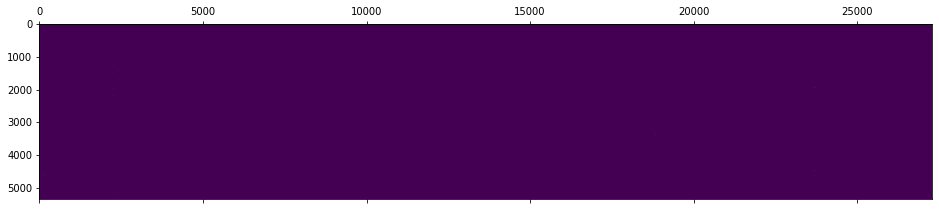

In [143]:
plt.matshow(count) # A是一个二维数组或矩阵
plt.show()

In [7]:
#计算实体和MesH的tf-idf
e=pre_data(df,4)
mesh=pre_data(df,6)
tf_idf_e=Tf_idf(e)
tf_idf_mesh=Tf_idf(mesh)

E:\Anaconda\envs\pytorch.gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000', '0000000000001155', '0000000000004693', '001', '0019', '0035', '0063794', '00835231', '00991', '01', '010', '012', '0145', '018', '019', '01a1', '01a1s1', '01ew2012', '01ja1915', '01s1', '02', '0205221', '021', '02s2', '03', '0356', '04', '042', '04227r1', '04227r2', '04227r4', '0442', '0451', '046', '05', '051', '052', '05556', '05567', '057', '059', '06', '061', '06289', '063', '064', '06559', '066', '06651600', '067', '068', '069', '06928', '07', '07113', '072', '07304814', '07321332', '074', '07999', '08356', '09', '0903', '0912', '0974', '0991', '10', '100', '1000', '1000005', '1000016', '1001', '1002', '100356', '1006', '100x', '101', '1018', '101e', '101t', '102', '103a', '104', '1053g', '1053u', '106', '1060', '106a', '1083q', '108delsgf', '10993', '1099gtc', '10a', '10c', '10e', '10e4', '10p', '10r2', '10rb', '10rbeta', '10s', '10x', '11', '110', '1100', '1103701c', '11083g', '111', '11288', '11296', '1131', '11334a1', '1142', '1143l', '1158', '116', '1184', '118c', '1

In [44]:
df

,Unnamed: 0,order number,start,end,entity,entity_type,MESH
0,0,32911311,0,16,Critical illness,Disease,MESH:D016638
1,1,32911311,59,67,COVID-19,Disease,MESH:C000657245
2,2,32911311,68,77,infection,Disease,MESH:D007239
3,3,32911311,107,115,COVID-19,Disease,MESH:C000657245
4,4,32911311,116,125,infection,Disease,MESH:D007239
...,...,...,...,...,...,...,...
652973,1652974,33534278,2926,2934,overdose,Disease,MESH:D062787
652974,1652975,33534278,2950,2958,naloxone,Chemical,MESH:D009270
652975,1652976,33534278,3037,3045,overdose,Disease,MESH:D062787
652976,1652977,33534278,3199,3207,naloxone,Chemical,MESH:D009270


In [ ]:
from sklearn.decomposition import TruncatedSVD
# 使用TruncatedSVD类来对tf-idf矩阵进行SVD，并指定要降到的维度数（这里假设为2）
svd = TruncatedSVD(n_components=100)
svd.fit(tf_idf_e)

# 查看奇异值和右奇异向量（也就是主题向量）
print(svd.singular_values_)
print(svd.components_)

In [52]:
# 使用TruncatedSVD对象的transform()方法来将tf-idf矩阵投影到低维空间，并返回降维后的矩阵
lsa_matrix = svd.transform(tf_idf_e)

# 查看降维后的矩阵的形状和内容
print(lsa_matrix.shape)
print(lsa_matrix)

NameError: name 'svd' is not defined

In [72]:
raw = pd.read_csv('e_m_2.csv', index_col=False)
raw

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,id,label
0,1,7.877025e-02,0.001978,0.000005,0.057621,-0.042010,0.021840,-0.000077,-0.013879,0.020031,...,-0.011278,0.003057,-0.002292,0.013919,-0.021095,-0.048678,-0.005890,-0.000625,34061905,2
1,8,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,...,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064,32878481,2
2,9,5.421860e-03,0.020955,0.000012,0.080490,-0.177387,-0.038315,0.002137,0.232461,0.308464,...,0.004439,0.001764,0.015996,-0.016735,-0.001959,0.026729,-0.012457,-0.005482,33439908,2
3,20,8.587287e-02,0.002819,0.000004,0.086989,-0.079038,0.018301,-0.000199,-0.028877,0.001049,...,-0.052098,0.026498,-0.045593,0.025076,-0.014667,-0.050675,0.004111,-0.002784,34622966,2
4,33,7.444382e-01,0.035443,0.000068,0.743955,-0.102217,-0.025369,-0.001156,-0.124519,0.036692,...,-0.004041,-0.026585,-0.006503,0.012998,-0.021427,-0.046275,0.010208,0.008041,34630838,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11310,89444,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,...,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064,33681743,2
11311,89448,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,...,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064,33063542,2
11312,89455,9.900000e-08,0.000004,1.341063,-0.000300,-0.000538,-0.000076,-0.448238,0.003608,-0.000036,...,-0.000260,0.000043,0.000096,-0.000287,-0.000046,0.000269,-0.000239,0.000094,33529226,2
11313,89476,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,...,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064,34567959,2


In [73]:
datad = raw.iloc[:,1:101].copy()

In [74]:
datad

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,7.877025e-02,0.001978,0.000005,0.057621,-0.042010,0.021840,-0.000077,-0.013879,0.020031,2.965810e-02,...,-0.011650,0.000123,-0.011278,0.003057,-0.002292,0.013919,-0.021095,-0.048678,-0.005890,-0.000625
1,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,-1.067709e-03,...,-0.000291,0.000016,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064
2,5.421860e-03,0.020955,0.000012,0.080490,-0.177387,-0.038315,0.002137,0.232461,0.308464,-4.527088e-02,...,-0.011276,0.003868,0.004439,0.001764,0.015996,-0.016735,-0.001959,0.026729,-0.012457,-0.005482
3,8.587287e-02,0.002819,0.000004,0.086989,-0.079038,0.018301,-0.000199,-0.028877,0.001049,4.971359e-02,...,-0.204737,0.009857,-0.052098,0.026498,-0.045593,0.025076,-0.014667,-0.050675,0.004111,-0.002784
4,7.444382e-01,0.035443,0.000068,0.743955,-0.102217,-0.025369,-0.001156,-0.124519,0.036692,3.428244e-03,...,0.010652,0.009052,-0.004041,-0.026585,-0.006503,0.012998,-0.021427,-0.046275,0.010208,0.008041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11310,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,-1.067709e-03,...,-0.000291,0.000016,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064
11311,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,-1.067709e-03,...,-0.000291,0.000016,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064
11312,9.900000e-08,0.000004,1.341063,-0.000300,-0.000538,-0.000076,-0.448238,0.003608,-0.000036,-7.430000e-07,...,-0.000002,0.000131,-0.000260,0.000043,0.000096,-0.000287,-0.000046,0.000269,-0.000239,0.000094
11313,1.412551e+00,-0.015078,-0.000006,-0.061682,0.021836,0.001296,0.000043,0.005445,0.001100,-1.067709e-03,...,-0.000291,0.000016,-0.000002,0.000008,0.000018,-0.000037,-0.000090,-0.000092,-0.000003,0.000064


In [75]:
# 导入numpy库
import numpy as np

# 假设有一个二维数组data，每一行是一个样本，每一列是一个特征
data = datad

# 计算每个特征的均值，得到一个一维数组
means = np.mean(data, axis=0)

# 计算每个样本和均值的欧氏距离，得到一个一维数组
distances = np.linalg.norm(data - means, axis=1)

In [76]:
distances = pd.DataFrame(distances)
X= np.concatenate ( (raw.iloc[:,101:103], distances), axis=1) # 沿着第0轴（行）合并
X = pd.DataFrame(X)
X

,0,1,2
0,34061905.0,2.0,1.392590
1,32878481.0,2.0,0.728465
2,33439908.0,2.0,1.518978
3,34622966.0,2.0,1.537230
4,34630838.0,2.0,1.168586
...,...,...,...
11310,33681743.0,2.0,0.728465
11311,33063542.0,2.0,0.728465
11312,33529226.0,2.0,1.524995
11313,34567959.0,2.0,0.728465


In [77]:
X.to_csv('result_2.csv')

In [18]:
label.to_csv('label.csv')
# 找出距离最小的索引，得到一个整数
index = np.argmin(distances)

# 打印结果
print("The mean of each feature is:", means)
print("The sample closest to the mean is:", data[index])

The mean of each feature is: 0     0.716223
1     0.151505
2     0.086846
3     0.042895
4    -0.000087
        ...   
95    0.001699
96    0.000990
97    0.000366
98    0.000147
99    0.000367
Length: 100, dtype: float64


KeyError: 63137

In [52]:
index

4826

In [53]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
df

,Unnamed: 0,order number,start,end,entity,entity_type,MESH
0,0,32911311,0,16,Critical illness,Disease,MESH:D016638
1,1,32911311,59,67,COVID-19,Disease,MESH:C000657245
2,2,32911311,68,77,infection,Disease,MESH:D007239
3,3,32911311,107,115,COVID-19,Disease,MESH:C000657245
4,4,32911311,116,125,infection,Disease,MESH:D007239
...,...,...,...,...,...,...,...
652973,1652974,33534278,2926,2934,overdose,Disease,MESH:D062787
652974,1652975,33534278,2950,2958,naloxone,Chemical,MESH:D009270
652975,1652976,33534278,3037,3045,overdose,Disease,MESH:D062787
652976,1652977,33534278,3199,3207,naloxone,Chemical,MESH:D009270


In [55]:
id=df.iloc[:,1]
id = id.tolist()
idd = list(set(id))
idd=sorted(idd)

In [57]:
len(idd)

8958

In [58]:
idd[index]

33883260

In [34]:
titles = ["This is a long title that needs to be truncated", "Another long title that needs to be truncated", "A short title"]*30000

In [35]:
titles

['This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be truncated',
 'Another long title that needs to be truncated',
 'A short title',
 'This is a long title that needs to be 

In [5]:
def pre_data(df,n):
    id=df.iloc[:,1]
    id = id.tolist()
    idd = list(set(id))
    idd=sorted(idd)
    #计算每篇文章实体的的it-idf值
    a = []
    for i in idd:
        idex = []
        idex = index_all(i,id)
        ents=df.iloc[idex,n]
        strd = ents.str.cat(sep=' ')#转换为一行字符串
        a.append(strd)
    return a

def index_all(numd,lst):
    indices = []
    start = 0
    end = len(lst)
    try:
        while True:
            idx = lst.index(numd,start,end)
            indices.append(idx)
            start = idx + 1
    except ValueError:
        pass
    return indices

def Tf_idf(a):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(a)
    #print(vectorizer.get_feature_names())
    #print(X.toarray())
    return X.toarray()

def countvect(a):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(a)
    #print(vectorizer.get_feature_names())
    #print(X.toarray())
    count = X.toarray()
    return count

#计算实体和MesH的tf-idf
e=pre_data(df,4)
mesh=pre_data(df,6)
tf_idf_e=Tf_idf(e)
tf_idf_mesh=Tf_idf(mesh)